In [1]:
import numpy as np # linear algebra

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
import sklearn

In [3]:
#to data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [4]:
#NLP tools
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/purplerain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
#train split and fit models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import TweetTokenizer


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report


In [11]:
dataset = pd.read_csv('/Users/purplerain/Desktop/FaLsE ArT/labeled_data.csv')
dataset.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [12]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [13]:
dataset.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,24783.0,12681.192027,7299.553863,0.0,6372.5,12703.0,18995.5,25296.0
count,24783.0,3.243473,0.883060,3.0,3.0,3.0,3.0,9.0
hate_speech,24783.0,0.280515,0.631851,0.0,0.0,0.0,0.0,7.0
offensive_language,24783.0,2.413711,1.399459,0.0,2.0,3.0,3.0,9.0
neither,24783.0,0.549247,1.113299,0.0,0.0,0.0,0.0,9.0
class,24783.0,1.110277,0.462089,0.0,1.0,1.0,1.0,2.0


In [14]:
dt_transformed = dataset[['class', 'tweet']]
y = (dt_transformed.iloc[:, :-1].values).ravel()
dt_transformed

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [15]:
# Dividindo o df em treino e teste
df_train, df_test = train_test_split(dt_transformed, test_size = 0.10, random_state = 42, stratify=dt_transformed['class'])
df_train.shape, df_test.shape

((22304, 2), (2479, 2))

<Axes: xlabel='class'>

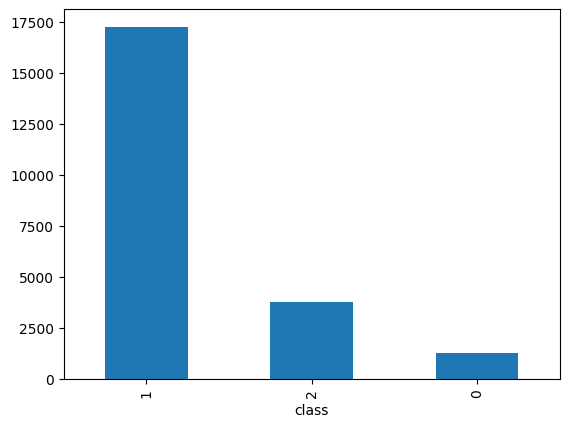

In [16]:
df_train['class'].value_counts().plot(kind='bar')


0 - Discurso de ódio

1 - Linguagem ofensiva

2 - nenhum dos dois

In [17]:
def preprocessing(data):
    stemmer = nltk.stem.RSLPStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    corpus = []
    for tweet in data:
      review = re.sub(r"@[A-Za-z0-9_]+", " ", tweet)
      review = re.sub('RT', ' ', review)
      review = re.sub(r"https?://[A-Za-z0-9./]+", " ", review)
      review = re.sub(r"https?", " ", review)
      review = re.sub('[^a-zA-Z]', ' ', review)
      review = review.lower()
      review = review.split()
      ps = PorterStemmer()
      review = [ps.stem(word) for word in review if not word in set(all_stopwords) if len(word) > 2]
      review = ' '.join(review)
      corpus.append(review)

    return np.array(corpus)

In [18]:
import nltk
nltk.download('rslp')


[nltk_data] Downloading package rslp to /Users/purplerain/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [19]:
corpus = preprocessing(df_train['tweet'].values)
corpus.shape

(22304,)

In [20]:
# treino e validação do corpus
c_train, c_vad, y_train, y_vad = train_test_split(corpus, df_train['class'], test_size = 0.10, random_state = 42, stratify=df_train['class'])
c_train.shape, c_vad.shape

((20073,), (2231,))

In [21]:
def tokenize(c_train, c_vad):
    tweet_tokenizer = TweetTokenizer() 
    vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize, max_features = 1010)
    X_train = vectorizer.fit_transform(c_train).toarray()
    X_vad = vectorizer.transform(c_vad).toarray()
    return X_train, X_vad

In [22]:
X_train, X_vad = tokenize(c_train, c_vad)
X_train.shape, X_vad.shape


/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


((20073, 1010), (2231, 1010))

In [23]:
# Logistic Regression
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 0)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_vad)

/var/folders/rb/b2pqfzyd15s3x7pls_6w3wx40000gn/T/ipykernel_16578/3664991605.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())
/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


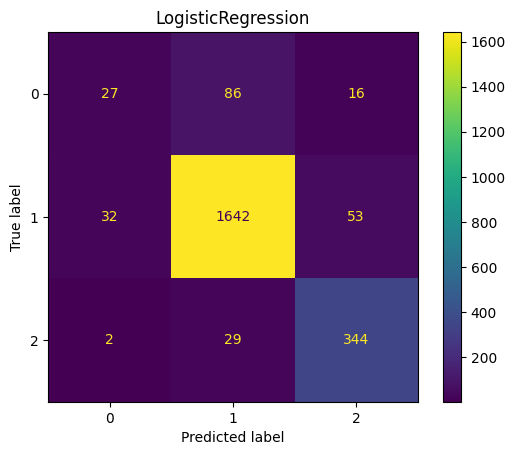

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

def set_confusion_matrix(clf, X, y, title):
    # Generate confusion matrix display from the estimator
    disp = ConfusionMatrixDisplay.from_estimator(clf, X, y)
    disp.ax_.set_title(title)
    plt.show()

# Example usage:
set_confusion_matrix(model, X_vad, y_vad, type(model).__name__)


In [27]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_vad, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.44      0.21      0.28       129
     class 1       0.93      0.95      0.94      1727
     class 2       0.83      0.92      0.87       375

    accuracy                           0.90      2231
   macro avg       0.74      0.69      0.70      2231
weighted avg       0.89      0.90      0.89      2231



%Analisando melhor as palavras de cada classe¶%

In [29]:
conjunto = c_train
hate_tweets = [sentence for sentence, label in zip(conjunto, y) if label == 0]
off_tweets = [sentence for sentence, label in zip(conjunto, y) if label == 1]
none_tweets = [sentence for sentence, label in zip(conjunto, y) if label == 2]

In [30]:
hate_words = ' '.join(hate_tweets)
off_words = ' '.join(off_tweets)
none_words = ' '.join(none_tweets)

In [31]:
def get_wordcloud(text):
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

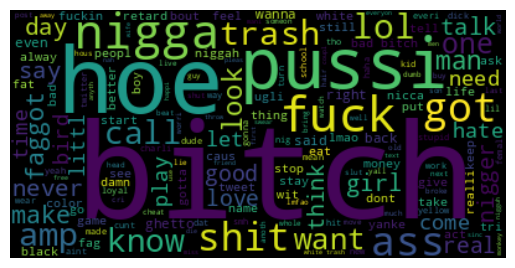

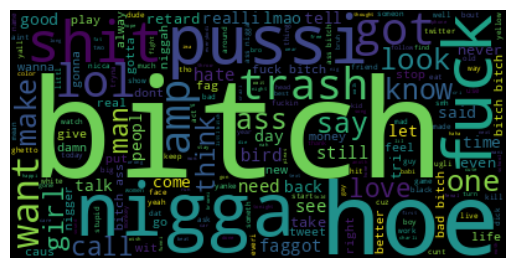

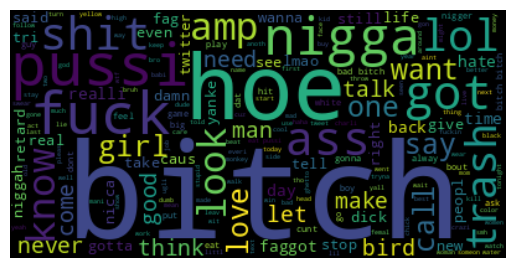

In [32]:
get_wordcloud(hate_words)
get_wordcloud(off_words)
get_wordcloud(none_words)

In [39]:
def wordListToFreqDict(wordlist):
    wordfreq = [(wordlist.count(p))/len(wordlist) for p in wordlist]
    return dict(list(zip(wordlist,wordfreq)))

In [40]:
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [41]:
hate_dict = sortFreqDict(wordListToFreqDict(hate_words.split()))
off_dict = sortFreqDict(wordListToFreqDict(off_words.split()))
none_dict = sortFreqDict(wordListToFreqDict(none_words.split()))

In [42]:
len(hate_dict), len(off_dict), len(none_dict)

(2624, 11775, 5189)

Pegando as palavras que mais aparecem em cada classe



In [53]:
from nltk.tokenize import TweetTokenizer


In [54]:
def get_common(wordlist, n):
    return ([w[1] for w in wordlist])[:n]

common_words = list()
common_words.append(get_common(hate_dict, 2000))
common_words.append(get_common(off_dict, 1000))
common_words.append(get_common(none_dict, 1000))
common_words = np.unique(np.hstack(common_words))

In [55]:
common_words_dict = ({i:j for i, j in zip(common_words, range(len(common_words)))})


In [57]:
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the TweetTokenizer
tweet_tokenizer = TweetTokenizer()

# Define the CountVectorizer using the tweet_tokenizer
vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize, vocabulary=common_words_dict)

# Fit and transform the training data
X_train = vectorizer.fit_transform(c_train).toarray()

# Transform the validation data
X_vad = vectorizer.transform(c_vad).toarray()


/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [58]:
# Logistic Regression
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 0)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_vad)

/var/folders/rb/b2pqfzyd15s3x7pls_6w3wx40000gn/T/ipykernel_16578/3664991605.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())
/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


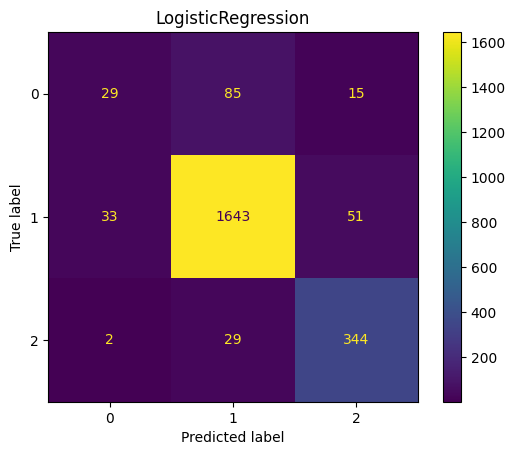

In [59]:
set_confusion_matrix(model, X_vad, y_vad, type(model).__name__)

In [60]:

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_vad, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.45      0.22      0.30       129
     class 1       0.94      0.95      0.94      1727
     class 2       0.84      0.92      0.88       375

    accuracy                           0.90      2231
   macro avg       0.74      0.70      0.71      2231
weighted avg       0.89      0.90      0.89      2231



UNDERSAMPLING
Vemos que os algoritmos ainda continuam confundindo bastante hate speech (0) com offensive language(1). Vamos tentar melhorar o problema de balanceamento desses dados.

In [61]:
n_off, n_none, n_hate = df_train['class'].value_counts()
n_hate, n_off, n_none 

(1287, 17270, 3747)

In [62]:
df_hate = df_train[df_train['class'] == 0]
df_off = df_train[df_train['class'] == 1]
df_none = df_train[df_train['class'] == 2]

In [63]:
df_off_under = df_off.sample(n_hate, random_state=0)
df_none_under = df_none.sample(n_hate, random_state=0)

df_under = pd.concat([df_hate, df_off_under, df_none_under], axis=0)
print(df_under['class'].value_counts())

class
0    1287
1    1287
2    1287
Name: count, dtype: int64


Treinando agora os modelos com estes dados:



In [64]:
corpus_under = preprocessing(df_under['tweet'].values)


In [65]:
# treino e validação do corpus
c_train, c_vad, y_train, y_vad = train_test_split(corpus_under, df_under['class'], test_size = 0.10, random_state = 42, stratify=df_under['class'])
c_train.shape, c_vad.shape

((3474,), (387,))

In [66]:
X_train, X_vad = tokenize(c_train, c_vad)
X_train.shape, X_vad.shape

/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


((3474, 1010), (387, 1010))

In [67]:
# Logistic Regression
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 0)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_vad)

/var/folders/rb/b2pqfzyd15s3x7pls_6w3wx40000gn/T/ipykernel_16578/3664991605.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())
/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


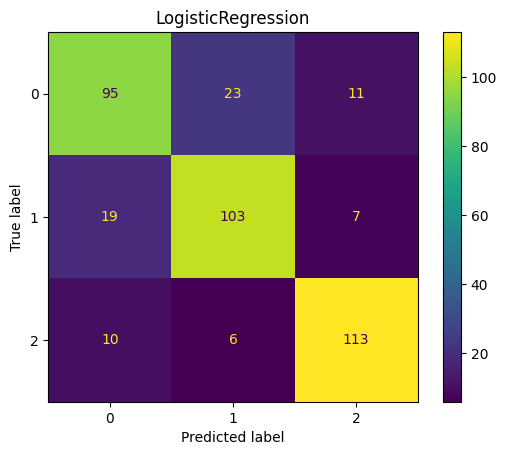

In [68]:
set_confusion_matrix(model, X_vad, y_vad, type(model).__name__)


In [69]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_vad, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.77      0.74      0.75       129
     class 1       0.78      0.80      0.79       129
     class 2       0.86      0.88      0.87       129

    accuracy                           0.80       387
   macro avg       0.80      0.80      0.80       387
weighted avg       0.80      0.80      0.80       387



OVERSAMPLING¶


In [70]:
n_off, n_none, n_hate = df_train['class'].value_counts()
n_hate, n_off, n_none 

(1287, 17270, 3747)

In [71]:
df_hate_over = df_hate.sample(n_off, replace=True, random_state=0)
df_none_over = df_none.sample(n_off, replace=True, random_state=0)
df_over = pd.concat([df_off, df_hate_over, df_none_over], axis=0)

print('Random over-sampling:')
print(df_over['class'].value_counts())

Random over-sampling:
class
1    17270
0    17270
2    17270
Name: count, dtype: int64


In [72]:
corpus_over = preprocessing(df_over['tweet'].values)
# treino e validação do corpus
c_train, c_vad, y_train, y_vad = train_test_split(corpus_over, df_over['class'], test_size = 0.10, random_state = 42, stratify=df_over['class'])
c_train.shape, c_vad.shape

((46629,), (5181,))

In [73]:
X_train, X_vad = tokenize(c_train, c_vad)
X_train.shape, X_vad.shape

/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


((46629, 1010), (5181, 1010))

In [74]:
# Logistic Regression
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 0)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_vad)

/var/folders/rb/b2pqfzyd15s3x7pls_6w3wx40000gn/T/ipykernel_16578/3664991605.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())
/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


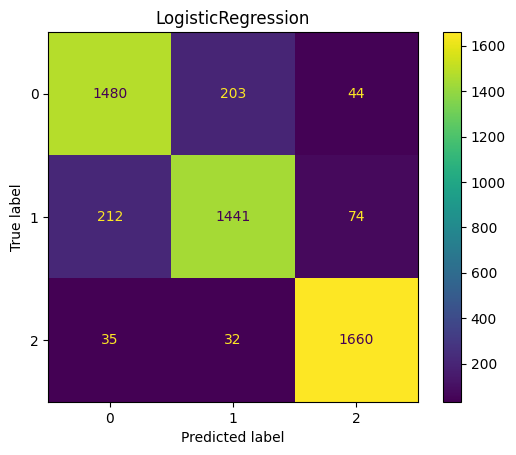

              precision    recall  f1-score   support

     class 0       0.86      0.86      0.86      1727
     class 1       0.86      0.83      0.85      1727
     class 2       0.93      0.96      0.95      1727

    accuracy                           0.88      5181
   macro avg       0.88      0.88      0.88      5181
weighted avg       0.88      0.88      0.88      5181



In [75]:
set_confusion_matrix(model, X_vad, y_vad, type(model).__name__)
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_vad, y_pred, target_names=target_names))